# t1_filtro_adapt - DSP - Marcos Paulo Soares - [Eng. Computação]
<img src='Aula_filtro_adapt.jpg' width="600" height="480">
<img src='LMS.jpg' width="600" height="480">
https://youtu.be/F8QRibqxTU8?si=xTBWWlUfbgzfjqZ0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\androidstudio\\OneDrive - UNIVALI\\MarcosSoaresUnivali\\Univali\\21814_PDS\\Aula_28nov\\M3'

In [2]:
# Carregar Coeficientes
with open('Coeficiente_MM_8.dat', 'r') as f:
    coefs= [line.strip().replace(',', '') for line in f]
coefs

['0.125', '0.125', '0.125', '0.125', '0.125', '0.125', '0.125', '0.125']

In [3]:
coef = np.zeros(len(coefs))
print(coefs)
for i in range(len(coefs)):
    coef[i] = np.float64(coefs[i].split(','))
print(coef)

['0.125', '0.125', '0.125', '0.125', '0.125', '0.125', '0.125', '0.125']
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


C:\Users\androidstudio\AppData\Local\Temp\ipykernel_1648\236438742.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coef[i] = np.float64(coefs[i].split(','))


In [4]:
# Carregar Entrada
with open('ruido_branco.pcm', 'rb') as fid:
    x = np.fromfile(fid, np.int16)
fid.close()

print(len(x))

8000


# Amostras desejadas - Cálculo
<img src='LMS_d.jpg' width="600" height="480">

In [5]:
#u = 0.00000000009
u = 0.00000000007
#u = 0.00000002     # nao converge..
#u = 0.0000000000005  # passso, quanto menor melhor
K = 100            # COEF DESEJADOS
N = len(x)         # qntd de amostras

d = np.zeros(len(x))
e = np.zeros(len(x))
y = np.zeros(len(x), dtype=np.int16)
w = np.zeros(K)

amostrasD = np.zeros(len(coef))
amostrasY = np.zeros(len(w))

print(amostrasD)
print(amostrasY)

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [6]:
########################################################
# Sinal Esperado
# Ruido branco * coeficiente da desconhecido (MM)
########################################################
for i in range(len(x)):
    for j in range(len(coef)):
        if (i - j) >= 0:
            amostrasD[j] = x[i - j] * float(coef[j])
    d[i] = amostrasD.sum()

print(amostrasD)

[-429.625  103.875 -457.125 -103.125 1019.      18.75   737.375  348.125]


In [7]:
########################################################
# Sinal Atual
# Ruido branco * coeficiente que estamos descobrindo (vai iniciar com 0)
########################################################
for i in range(len(x)):
    for j in range(len(w)):
        if (i - j) >= 0:
            amostrasY[j] = x[i-j] * float(w[j])
    y[i] = amostrasY.sum()
    # Calcula o erro entre o esperado e o que temos
    e[i] = d[i] - y[i]    
    # Calcula os novos coef
    for k in range(len(w)):
        if (i - k) >= 0:
            w[k] = w[k] + (u * e[i] * x[i-k])

#print(amostrasY)
#print(y)
print(e)
print(w)

[ -516.125 -1129.75  -1081.375 ...    11.625    14.       13.25 ]
[ 1.23703310e-01  1.23755302e-01  1.23808023e-01  1.23749569e-01
  1.23712567e-01  1.23761238e-01  1.23727276e-01  1.23727851e-01
 -2.14567902e-04 -1.80876911e-04 -1.03843547e-04 -2.74140388e-05
  1.81005029e-04  1.49215867e-04  8.42374138e-05  2.08977702e-04
  2.82010785e-04  3.39617495e-04  1.24956274e-04 -4.37262000e-06
 -1.70325619e-04 -8.81378050e-05 -7.67827025e-05 -1.38382064e-04
 -2.83524596e-04 -3.51318642e-04 -2.03944702e-04 -1.25920191e-04
 -1.54911312e-04 -2.37907092e-04 -1.81462846e-04 -2.01668381e-04
 -2.70166391e-04 -2.04964769e-04 -2.31890339e-04 -1.60171314e-04
 -1.31032694e-04 -1.03852464e-04 -1.18810204e-04 -1.21145588e-05
  1.76241756e-04  1.79405739e-04  5.63197162e-05  1.34115739e-04
  2.49080886e-04  2.66913360e-04  2.07925069e-04  1.22820373e-04
  2.80551784e-04  2.04494273e-04  2.65014540e-04  2.41502415e-04
  1.12479483e-04  7.82738338e-05  5.53393837e-05  1.16045344e-04
 -1.02066212e-04 -3.8905

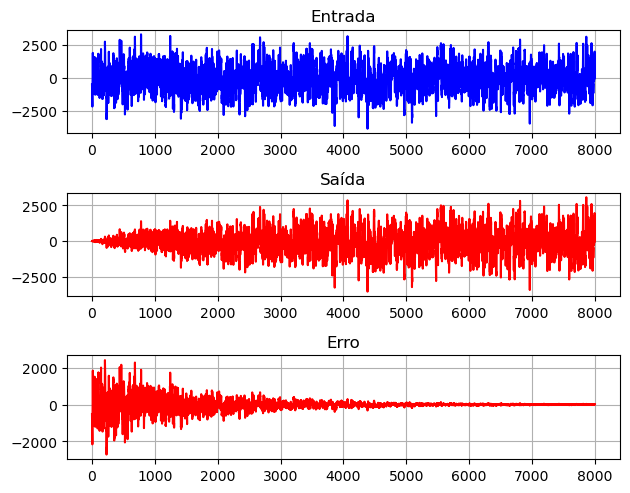

[ 1.23703310e-01  1.23755302e-01  1.23808023e-01  1.23749569e-01
  1.23712567e-01  1.23761238e-01  1.23727276e-01  1.23727851e-01
 -2.14567902e-04 -1.80876911e-04 -1.03843547e-04 -2.74140388e-05
  1.81005029e-04  1.49215867e-04  8.42374138e-05  2.08977702e-04
  2.82010785e-04  3.39617495e-04  1.24956274e-04 -4.37262000e-06
 -1.70325619e-04 -8.81378050e-05 -7.67827025e-05 -1.38382064e-04
 -2.83524596e-04 -3.51318642e-04 -2.03944702e-04 -1.25920191e-04
 -1.54911312e-04 -2.37907092e-04 -1.81462846e-04 -2.01668381e-04
 -2.70166391e-04 -2.04964769e-04 -2.31890339e-04 -1.60171314e-04
 -1.31032694e-04 -1.03852464e-04 -1.18810204e-04 -1.21145588e-05
  1.76241756e-04  1.79405739e-04  5.63197162e-05  1.34115739e-04
  2.49080886e-04  2.66913360e-04  2.07925069e-04  1.22820373e-04
  2.80551784e-04  2.04494273e-04  2.65014540e-04  2.41502415e-04
  1.12479483e-04  7.82738338e-05  5.53393837e-05  1.16045344e-04
 -1.02066212e-04 -3.89053088e-05 -6.00305212e-05 -1.48060815e-04
 -2.58248699e-04 -2.35637

In [8]:
plt.subplot(3,1,1)
plt.plot(d, 'b')
plt.title("Entrada")
plt.grid()
plt.subplot(3,1,2)
plt.plot(y, 'r')
plt.title("Saída")
plt.grid()
plt.tight_layout()
plt.subplot(3,1,3)
plt.plot(e, 'r')
plt.title("Erro")
plt.grid()
plt.show()

print(w)

In [9]:
with open("saida_lms.pcm", 'w') as fid:
    np.array(y, dtype=np.int16).tofile(fid)
fid.close()

with open("saida_lms_d.pcm", 'w') as fid:
    np.array(d, dtype=np.int16).tofile(fid)
fid.close()